PК1

Овчинников Д.А. ИУ5-23М

Вариант 4

Задачи 4, 24

Дополнительные данные: для произвольной колонки данных построить график "Ящик с усами (boxplot)"

Набор данных "Tree Survival Prediction", который часто используется для прогнозирования выживаемости деревьев. Он содержит как числовые, так и категориальные признаки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [6]:
# Загрузка датасета
df = pd.read_csv("Tree_Data.csv")
df.head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


**Кодирование одного (произвольного) категориального признака с использованием метода "label encoding"**

In [8]:
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])
df.head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive,Species_encoded
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN,0
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X,2
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN,3
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN,0
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN,0


**Обнаружение и удаление выбросов на основе 5% и 95% квантилей**

In [11]:
col = 'Phenolics'
q_low = df[col].quantile(0.05)
q_high = df[col].quantile(0.95)

# Отфильтрованные данные
df_filtered = df[(df[col] >= q_low) & (df[col] <= q_high)]

# Размеры до и после
print(f"До фильтрации: {df.shape[0]} строк")
print(f"После фильтрации: {df_filtered.shape[0]} строк")

До фильтрации: 2783 строк
После фильтрации: 2507 строк


**Построить график "Ящик с усами (boxplot)"**

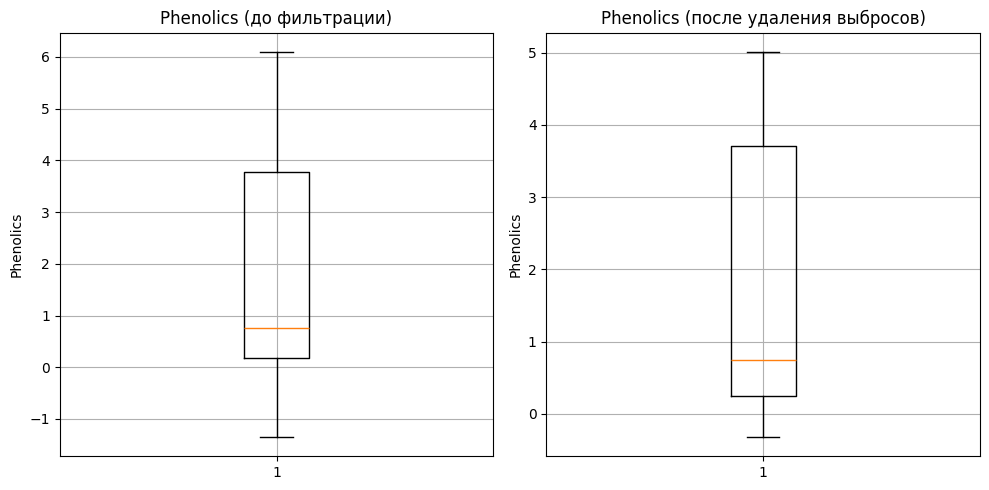

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].boxplot(df[col].dropna())
axes[0].set_title(f'{col} (до фильтрации)')

axes[1].boxplot(df_filtered[col].dropna())
axes[1].set_title(f'{col} (после удаления выбросов)')

for ax in axes:
    ax.set_ylabel(col)
    ax.grid(True)

plt.tight_layout()
plt.show()